In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from astropy.io import fits

def check_light_images(directory):
    light_images = []
    for filename in os.listdir(directory):
        if filename.endswith('.fits'):
            filepath = os.path.join(directory, filename)
            with fits.open(filepath) as hdul:
                header = hdul[0].header
                if 'IM_STYLE' in header and header['IM_STYLE'] == 'Light':
                    light_images.append(filepath)
    return light_images

directory = '/content/drive/MyDrive/UNPROCESSED DATA 1/fits files'
light_images = check_light_images(directory)
print("Light images found:")
for image_path in light_images:
    print(image_path)

print(len(light_images))


Light images found:
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_191.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_082.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_065.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_084.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_139.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_069.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_161.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_196.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_075.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_168.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_080.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_164.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/20220105_076.fits
/content/drive/MyDrive/UNPROCESSED DATA 1/fits files/2022

In [ ]:
import os

def count_files_in_directory(directory):
    # List all files in the directory
    files = os.listdir(directory)

    # Count the number of files
    num_files = len(files)

    return num_files

# Example usage
directory_path = "/content/drive/MyDrive/UNPROCESSED DATA 1/stars"
file_count = count_files_in_directory(directory_path)
print("Number of files in directory:", file_count)


Number of files in directory: 84


In [ ]:
from astropy.io import fits
fits_image_filename = ('/content/drive/MyDrive/UNPROCESSED DATA 1/bias_subtracted_images/20220105_065.fits')

hdul = fits.open(fits_image_filename)
hdul.info()

Filename: /content/drive/MyDrive/UNPROCESSED DATA 1/bias_subtracted_images/20220105_065.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (1024, 1024)   float64   


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00


<ipython-input-2-b99032ee07b7>:4: DeprecationWarning: `photutils.DAOStarFinder` is a deprecated alias for `photutils.detection.DAOStarFinder` and will be removed in the future. Instead, please use `from photutils.detection import DAOStarFinder` to silence this warning.
  from photutils import DAOStarFinder


Detected star at coordinates: (82.42452571366562, 12.832270913749756)
Detected star at coordinates: (658.551925716715, 23.462003857305845)
Detected star at coordinates: (692.9503907374291, 42.11023577450464)
Detected star at coordinates: (426.2291529673809, 42.51529993761635)
Detected star at coordinates: (606.8886350600549, 68.25615186774466)
Detected star at coordinates: (104.88466596148835, 73.00975681717581)
Detected star at coordinates: (495.04413742018374, 77.75279097543888)
Detected star at coordinates: (938.1539831900969, 96.93513357964011)
Detected star at coordinates: (1021.4057245807375, 102.48096207428209)
Detected star at coordinates: (111.1753996166826, 108.51186551204762)
Detected star at coordinates: (528.8383391150796, 121.904205906636)
Detected star at coordinates: (541.0836276319936, 130.28584372253073)
Detected star at coordinates: (541.1821462292195, 130.30318805390377)
Detected star at coordinates: (541.573269757876, 129.8954382096765)
Detected star at coordinates

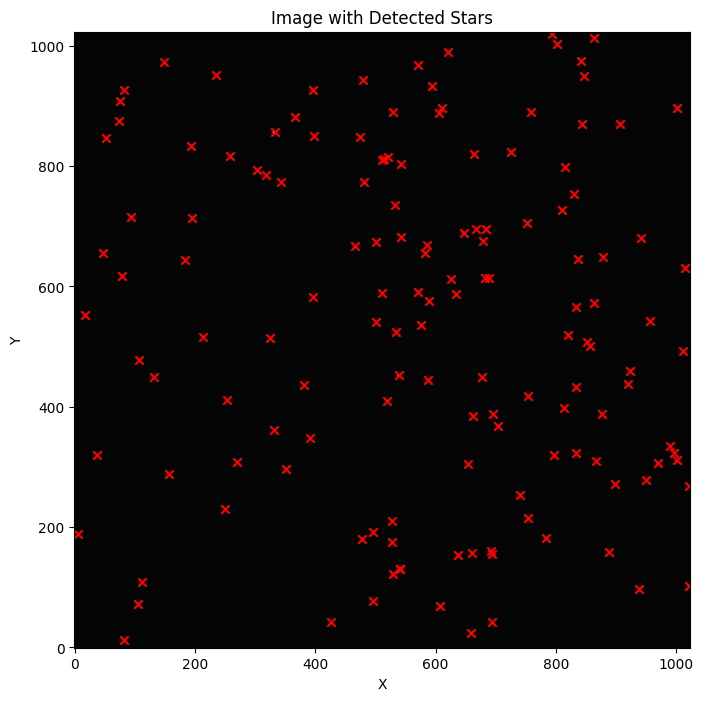

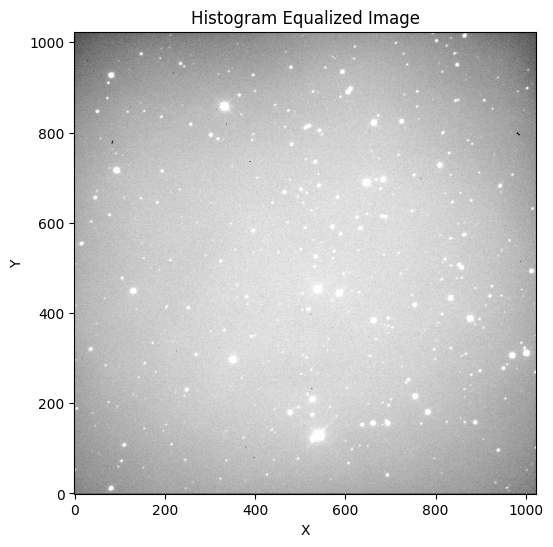

In [ ]:
!pip install photutils
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
from skimage import exposure

# Open the FITS file
fits_file = '/content/drive/MyDrive/UNPROCESSED DATA 1/bias_subtracted_images/20220105_065.fits'
hdul = fits.open(fits_file)
data = hdul[0].data

# Calculate sigma-clipped statistics of the image
mean, median, std = sigma_clipped_stats(data, sigma=3.0)

# Detect stars using DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
sources = daofind(data - median)

# Initialize a list to store the coordinates of detected stars
detected_star_coords = []

# Print and store the coordinates of detected stars
for x, y in zip(sources['xcentroid'], sources['ycentroid']):
    print(f"Detected star at coordinates: ({x}, {y})")
    detected_star_coords.append((x, y))

# Plot the image with detected stars
plt.figure(figsize=(10, 8))
plt.imshow(data, cmap='gray', origin='lower')
plt.scatter(sources['xcentroid'], sources['ycentroid'], color='red', marker='x')
plt.title('Image with Detected Stars')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Perform histogram equalization
data_equalized = exposure.equalize_hist(data)

# Plot the histogram equalized image
plt.figure(figsize=(8, 6))
plt.imshow(data_equalized, cmap='gray', origin='lower')
plt.title('Histogram Equalized Image')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Close the FITS file
hdul.close()

# Now you have the list of detected star coordinates in `detected_star_coords`
# print("List of detected star coordinates:", detected_star_coords)


<ipython-input-7-29a1164343f2>:4: DeprecationWarning: `photutils.DAOStarFinder` is a deprecated alias for `photutils.detection.DAOStarFinder` and will be removed in the future. Instead, please use `from photutils.detection import DAOStarFinder` to silence this warning.
  from photutils import DAOStarFinder


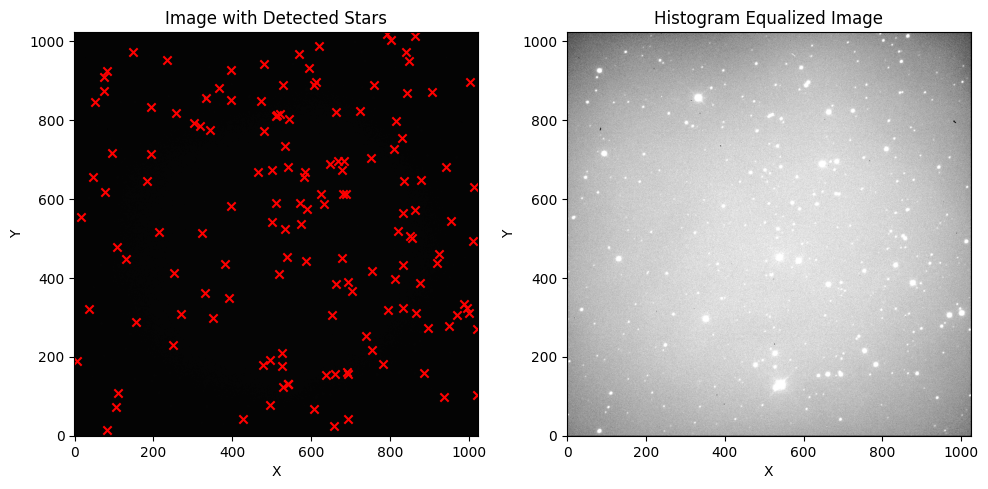

In [ ]:
!pip install photutils
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils import DAOStarFinder
from astropy.stats import sigma_clipped_stats
from skimage import exposure

# Open the FITS file
fits_file = '/content/drive/MyDrive/UNPROCESSED DATA 1/bias_subtracted_images/20220105_065.fits'
hdul = fits.open(fits_file)
data = hdul[0].data

# Calculate sigma-clipped statistics of the image
mean, median, std = sigma_clipped_stats(data, sigma=3.0)

# Detect stars using DAOStarFinder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)
sources = daofind(data - median)

# Extract the coordinates of detected stars
star_coords = list(zip(sources['xcentroid'], sources['ycentroid']))

# Plot the image with detected stars
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray', origin='lower')
plt.scatter(sources['xcentroid'], sources['ycentroid'], color='red', marker='x')
plt.title('Image with Detected Stars')
plt.xlabel('X')
plt.ylabel('Y')

# Perform histogram equalization
data_equalized = exposure.equalize_hist(data)

# Plot the equalized image
plt.subplot(1, 2, 2)
plt.imshow(data_equalized, cmap='gray', origin='lower')
plt.title('Histogram Equalized Image')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

# Close the FITS file
hdul.close()


In [ ]:
from astropy.io import fits

intensities = []
def read_fits_file(file_path):
    # Open the FITS file
    with fits.open(file_path) as hdul:
        # Extract the data from the primary HDU
        data = hdul[0].data

        # Get the dimensions of the image
        height, width = data.shape

        # Initialize lists to store coordinates and intensities
        x_coords = []
        y_coords = []
        intensities = []

        # Iterate over each pixel
        for y in range(height):
            for x in range(width):
                # Get the intensity at the current pixel
                intensity = data[y, x]

                # Append the x, y coordinates and intensity to the respective lists
                x_coords.append(x)
                y_coords.append(y)
                intensities.append(intensity)

        return x_coords, y_coords, intensities

def get_sorted_intensity(intensities):
    # Sort the intensities and return the sorted list
    return sorted(intensities)

# Path to the FITS file
fits_file_path = "/content/drive/MyDrive/UNPROCESSED DATA 1/bias_subtracted_images/20220105_065.fits"

# Read the FITS file and extract coordinates and intensities
x_coords, y_coords, intensities = read_fits_file(fits_file_path)

# Create a list of intensity-coordinate tuples
intensity_coords = [(intensity, (x, y)) for intensity, x, y in zip(intensities, x_coords, y_coords)]

# Sort the list of intensity-coordinate tuples based on intensity values
sorted_intensity_coords = sorted(intensity_coords, key=lambda x: x[0], reverse = True)

# Print the first 10 sorted intensities as an example
print("First 10 sorted intensities:", sorted_intensity_coords[:10])


First 10 sorted intensities: [(64813.0, (332, 858)), (64812.0, (332, 857)), (64812.0, (333, 857)), (64812.0, (334, 857)), (64812.0, (333, 858)), (64811.0, (332, 856)), (64811.0, (333, 856)), (64761.0, (540, 130)), (64761.0, (543, 130)), (64761.0, (543, 131))]


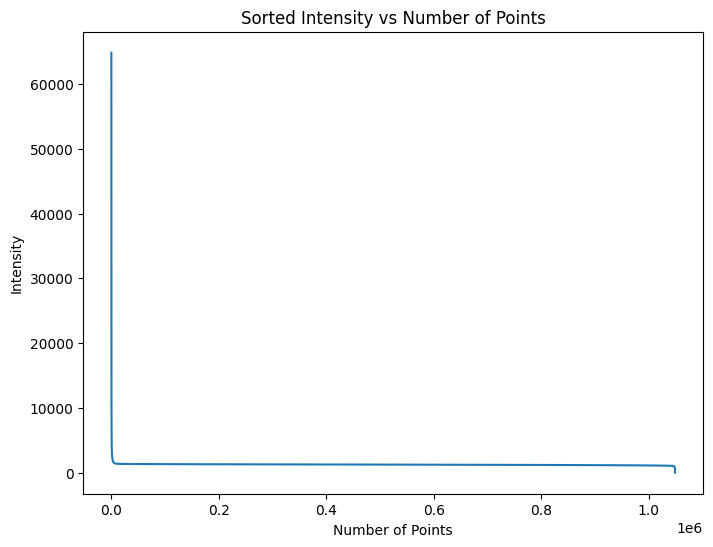

In [ ]:
import matplotlib.pyplot as plt


# Extract intensities from sorted_intensity_coords
sorted_intensity = [item[0] for item in sorted_intensity_coords]


# Plot sorted intensity vs number of points
plt.figure(figsize=(8, 6))
plt.plot(range(len(sorted_intensity)), sorted_intensity)
plt.xlabel('Number of Points')
plt.ylabel('Intensity')
plt.title('Sorted Intensity vs Number of Points')
plt.show()



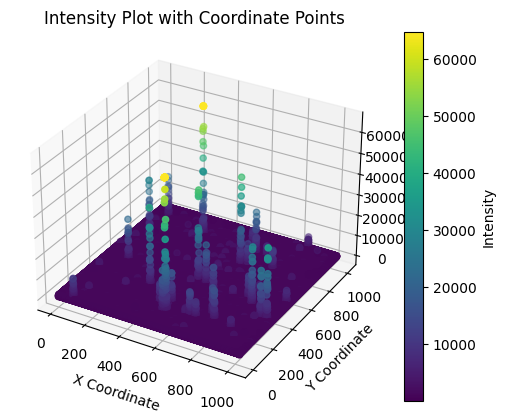

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the intensity values along with their coordinate points
sc = ax.scatter(x_coords, y_coords, intensities, c=intensities, cmap='viridis')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Intensity')
ax.set_title('Intensity Plot with Coordinate Points')

# Add a colorbar to indicate intensity levels
cbar = plt.colorbar(sc)
cbar.set_label('Intensity')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convergence_algorithm(intensity_coords):
    # Extract intensities from intensity-coordinate tuples
    intensities = np.array([item[0] for item in intensity_coords])

    # Initialize convergence threshold
    epsilon = 1e-6

    # Initialize lists to store mode, sigma, sorted intensities, and number of rejected pixels in each iteration
    modes = []
    sigmas = []
    sorted_intensities_list = []
    rejected_pixels = []

    iteration = 0
    while True:
        # Calculate mean, median, mode, and sigma of intensities
        mean = np.mean(intensities)
        median = np.median(intensities)
        mode = 2.5 * median - 1.5 * mean
        sigma = np.std(intensities)

        # Perform 3-sigma rejection
        lower_threshold = mode - 3 * sigma
        upper_threshold = mode + 3 * sigma
        num_rejected = np.sum((intensities < lower_threshold) | (intensities > upper_threshold))
        rejected_pixels.append(num_rejected)
        intensity_coords = [item for item in intensity_coords if lower_threshold <= item[0] <= upper_threshold]
        new_intensities = np.array([item[0] for item in intensity_coords])

        # Sort intensities after rejection
        sorted_intensities = np.sort(new_intensities)
        sorted_intensities_list.append(sorted_intensities)

        # Check for convergence
        if abs(np.std(new_intensities) - sigma) < epsilon and abs(2.5 * np.median(new_intensities) - 1.5 * np.mean(new_intensities) - mode) < epsilon:
            modes.append(mode)
            sigmas.append(sigma)
            break

        # Update intensities for next iteration
        intensities = new_intensities

        # Store mode and sigma for plotting
        modes.append(mode)
        sigmas.append(sigma)

        iteration += 1

    # Plot mode and sigma with iteration (Interactive Plot)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(modes) + 1), modes, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Mode')
    plt.title('Mode with Iteration')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(sigmas) + 1), sigmas, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Sigma')
    plt.title('Sigma with Iteration')
    plt.tight_layout()
    plt.show()

    # Plot number of rejected pixels in each iteration (Interactive Plot)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(rejected_pixels) + 1), rejected_pixels, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Number of Rejected Pixels')
    plt.title('Number of Rejected Pixels in Each Iteration')
    plt.show()

    # Plot sorted intensities after each iteration
    plt.figure(figsize=(8, 6))
    for i, sorted_intensities in enumerate(sorted_intensities_list):
        plt.plot(sorted_intensities, label=f'Iteration {i+1}')
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.title('Sorted Intensities after Each Iteration')
    plt.legend()
    plt.show()

    return intensity_coords


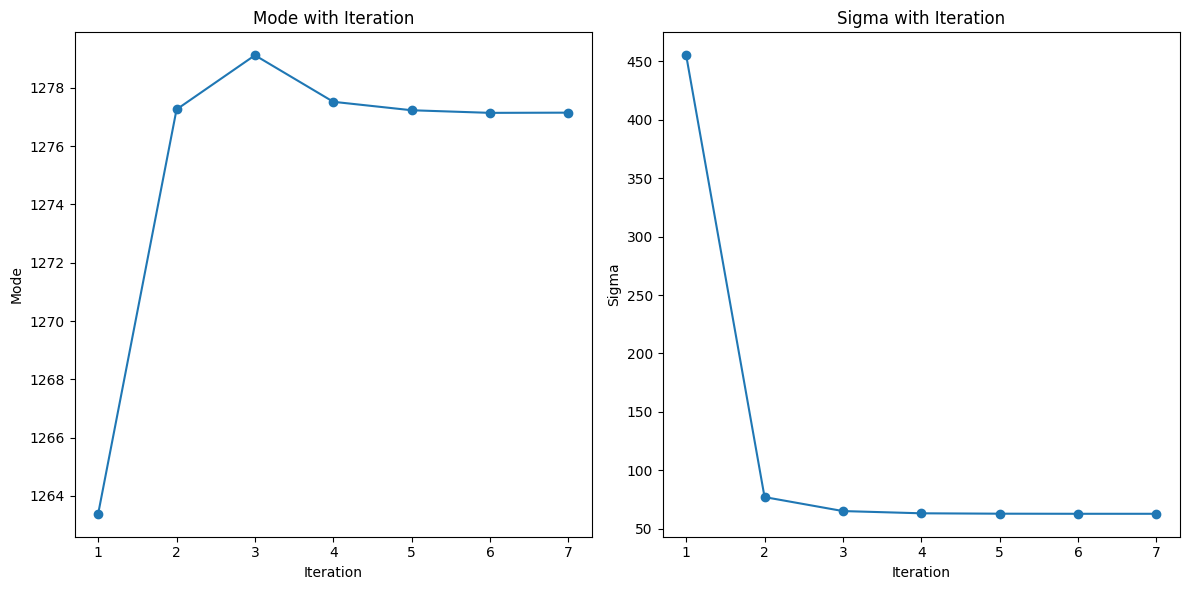

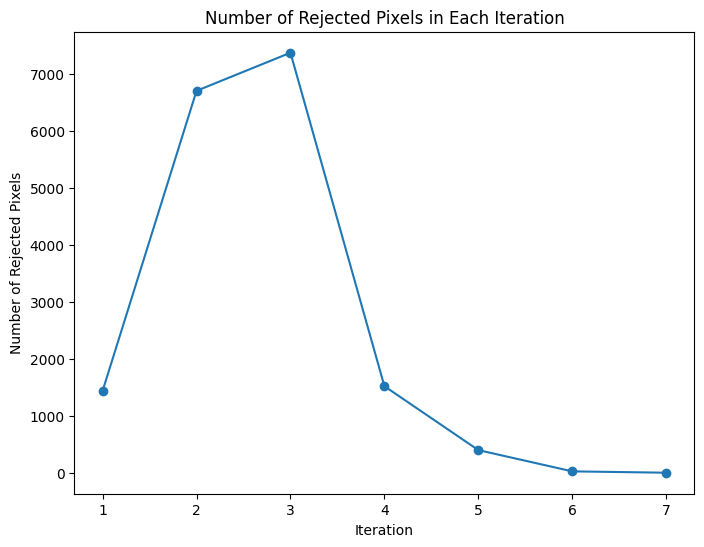

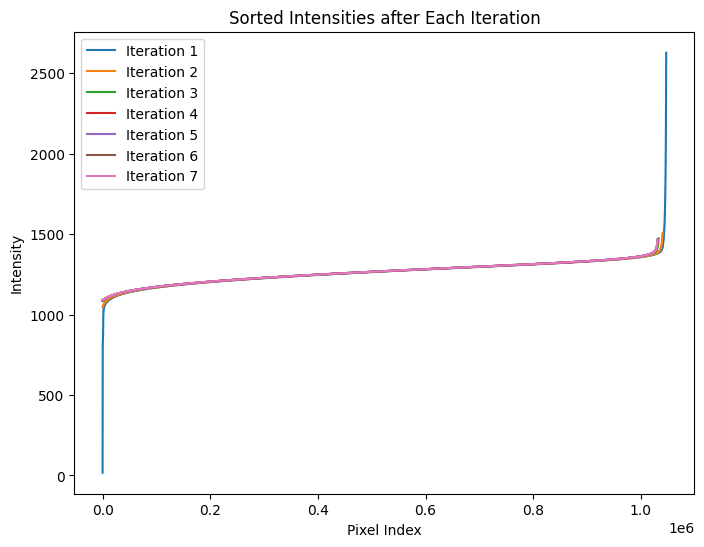

In [ ]:
# Apply convergence algorithm
converged_intensity_coords = convergence_algorithm(sorted_intensity_coords)


In [ ]:
print(len(intensities) - len(converged_intensity_coords))

print(converged_intensity_coords[0])
type(converged_intensity_coords[0])
type(converged_intensity_coords[1])

17453
(1465.0, (545, 121))


tuple

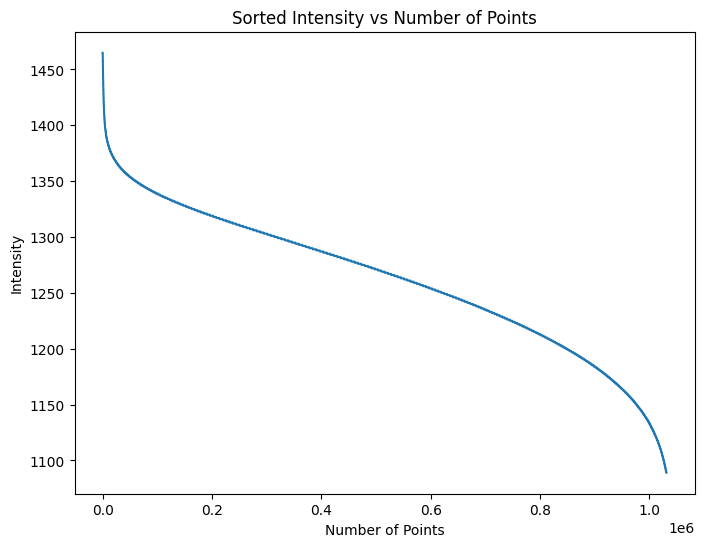

In [ ]:
import matplotlib.pyplot as plt


# Extract intensities from sorted_intensity_coords
sorted_intensity = [item[0] for item in converged_intensity_coords]

# Plot sorted intensity vs number of points
plt.figure(figsize=(8, 6))
plt.plot(range(len(sorted_intensity)), sorted_intensity)
plt.xlabel('Number of Points')
plt.ylabel('Intensity')
plt.title('Sorted Intensity vs Number of Points')
plt.show()



In [ ]:
converged_intensity_coords[0]

(1465.0, (545, 121))

In [ ]:
def find_neighbors(x, y, height, width, intensity_coord_set):
    # Define the offsets for 8 neighbors
    offsets = [(-1, -1), (-1, 0), (-1, 1),
               (0, -1),           (0, 1),
               (1, -1), (1, 0),  (1, 1)]

    neighbors = []
    for dx, dy in offsets:
        nx, ny = x + dx, y + dy
        if 0 <= nx < width and 0 <= ny < height and (nx, ny) in intensity_coord_set:
            neighbors.append((nx, ny))

    return neighbors


In [ ]:
def star_clustering(intensity_coords, width, height):
    # Initialize a dictionary to keep track of visited pixels
    visited = {(x, y): False for x in range(width) for y in range(height)}

    # Initialize a list to store the clusters
    clusters = []

    for intensity, (x, y) in intensity_coords:
        # Check if the pixel coordinates are within the valid range
        if x < 0 or x >= width or y < 0 or y >= height:
            continue

        # If the pixel is visited or not part of a star, continue
        if visited[(x, y)] or intensity == 0:
            continue

        # Initialize a queue for BFS
        queue = [(x, y)]
        cluster = []

        while queue:
            cx, cy = queue.pop(0)
            if visited[(cx, cy)]:
                continue

            # Mark pixel as visited
            visited[(cx, cy)] = True
            cluster.append((intensity, cx, cy))

            # Find neighbors
            neighbors = find_neighbors(cx, cy, height, width, intensity_coords)
            for nx, ny in neighbors:
                if not visited[(nx, ny)]:
                    queue.append((nx, ny))

        # Add cluster to the list of clusters
        clusters.append(cluster)

    return clusters


In [ ]:
# intensity_coords is a list of intensity-coordinate tuples [(intensity, x, y), ...]

intensity_coords = converged_intensity_coords
width = 1024
height = 1024

clusters = star_clustering(intensity_coords, width, height)
print(clusters)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
Pixel Value: 65535.0
X Coordinate: 541.0
Y Coordinate: 128.0
image data: 65535
Pixel Value: 65535.0
X Coordinate: 543.0
Y Coordinate: 131.0
image data: 65535
Pixel Value: 65535.0
X Coordinate: 541.0
Y Coordinate: 131.0
image data: 65535
Pixel Value: 65535.0
X Coordinate: 540.0
Y Coordinate: 131.0
image data: 65535
Pixel Value: 65535.0
X Coordinate: 332.0
Y Coordinate: 858.0
image data: 65535
1024   1024   0   1048576

Iteration 1 - Sigma: 456.2903139561376
Mode: 2013.0
Range from Mode - 3*sigma to Mode + 3*sigma: 644.1290581315873 - 3381.870941868413
Beginning of sky_val pointer : 0  & Ending of sky_val pointer 1047134

Iteration 2 - Sigma: 82.72689609963436
Mode: 2013.0
Range from Mode - 3*sigma to Mode + 3*sigma: 1764.819311

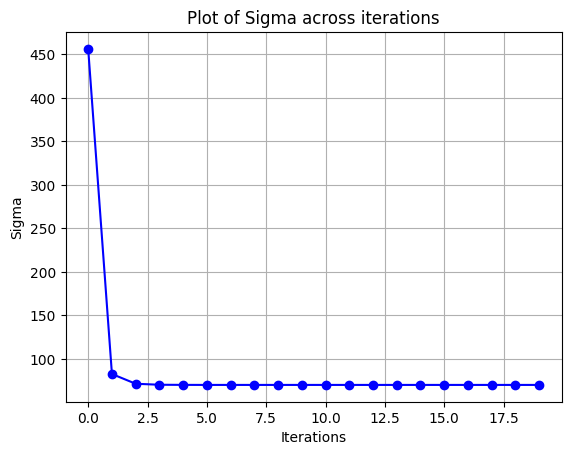

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the FITS image
filename = "/content/drive/MyDrive/UNPROCESSED DATA 1/stars/20220105_065.fits"
hdul = fits.open(filename)
image_data = hdul[0].data
hdul.close()

# Get image dimensions
height, width = image_data.shape

# Create a 2D boolean matrix with default value False
boolean_matrix = np.full((height, width), False, dtype=bool)
print(boolean_matrix)

# Initialize a 2D array to store pixel values and coordinates
data_array = np.zeros((height * width, 3), dtype=np.float64)  # 3 columns: pixel value, x coordinate, y coordinate

# Populate the data array with pixel values and coordinates
index = 0
for y in range(height):
    for x in range(width):
        value = image_data[y, x]
        # Store pixel value and coordinates in the data array
        data_array[index] = [value, x, y]
        index += 1

# Sort the data_array based on the pixel values (first column)
sorted_indices = np.argsort(data_array[:, 0])  # Get indices that would sort the array based on the first column
sorted_data_array = data_array[sorted_indices]  # Rearrange the rows of the array based on the sorted indices


# Accessing the pixel value, x coordinate, and y coordinate of the first pixel after sorting
for k in range(5):
    first_pixel_value, first_x_coordinate, first_y_coordinate = sorted_data_array[len(sorted_data_array)-1-k]
    print("Pixel Value:", first_pixel_value)
    print("X Coordinate:", first_x_coordinate)
    print("Y Coordinate:", first_y_coordinate)
    print("image data:",image_data[int(first_y_coordinate)][int(first_x_coordinate)])

n = 20
a = 0
b = len(sorted_data_array)

print(height, " ", width, " ", a, " ", b)
sky_val = sorted_data_array[a][0]
start_star_val = len(sorted_data_array) - 1
end_star_val = 0

print()
# Initialize histogram data
sigma_values = []
# Iterate n times
for i in range(n):
    # Calculate sigma between a and b
    sigma = np.std(sorted_data_array[a:b, 0])
    sigma_values.append(sigma)
    # Print sigma after each iteration
    print("Iteration", i + 1, "- Sigma:", sigma)

    # Filter out data within 3-sigma limit
    median_val = np.median(sorted_data_array[a:b, 0])

    # 3-sigma limit
    lower_limit = median_val - 3 * sigma
    upper_limit = median_val + 3 * sigma

    # Calculate mode
    mode_val = np.median(sorted_data_array[a:b, 0])
    sky_value = mode_val
    # Calculate range mode - 3*sigma to mode + 3*sigma
    lower_range = mode_val - 3 * sigma
    upper_range = mode_val + 3 * sigma

    print("Mode:", mode_val)
    print("Range from Mode - 3*sigma to Mode + 3*sigma:", lower_range, "-", upper_range)

    # Update a and b for the next iteration
    a = np.where(sorted_data_array[:, 0] >= lower_limit)[0][0]
    b = np.where(sorted_data_array[:, 0] <= upper_limit)[0][-1] + 1
    print("Beginning of sky_val pointer :",a," & Ending of sky_val pointer",b)
    end_star_val = b+1
    print()

# Plot the histogram of sigma values
plt.plot(sigma_values, marker='o', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Sigma')
plt.title('Plot of Sigma across iterations')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# 1. Identify STAR Flux pixels using 3*sigma rejection/selection
# Assuming final_values contains the flux values of the stars
sigma = 3 * np.std(final_values)
sky_value = 25  # Assuming SKY magnitude as 25
star_pixels = [i for i, value in enumerate(final_values) if value > sky_value + sigma]

# 2. Connect the neighboring STAR pixels
# Assuming each star is represented by a single index in the final_values list
star_clusters = []
for i in star_pixels:
    neighbors = [i - 1, i + 1, i - 1 * width, i + 1 * width, i - 1 - width, i - width, i + 1 - width, i - 1 + width,
                 i + width, i + 1 + width, i - 2, i + 2, i - 2 * width, i + 2 * width, i - 2 - width, i - 2 + width,
                 i - width * 2, i + width * 2, i + 2 - width * 2, i - 2 + width * 2]
    neighbors = [neighbor for neighbor in neighbors if 0 <= neighbor < len(final_values) and neighbor in star_pixels]
    star_clusters.append(neighbors)

# 3. Reconstruct the STARS
# Combine neighboring pixels into clusters
def find_cluster(pixel):
    for cluster in star_clusters:
        if pixel in cluster:
            return cluster

# 4. Subtract the SKY
# Assuming sky_value is subtracted from each pixel value
final_values_sky_subtracted = [value - sky_value for value in final_values]

# 5. Find the Star centroids (Sub-pixel)
# Calculate centroid of each star cluster
def find_cluster_centroids(clusters):
    centroids = []
    for cluster in clusters:
        total_intensity = 0
        weighted_sum_x = 0
        weighted_sum_y = 0
        for intensity, x, y in cluster:
            total_intensity += intensity
            weighted_sum_x += intensity * x
            weighted_sum_y += intensity * y
        centroid_x = weighted_sum_x / total_intensity
        centroid_y = weighted_sum_y / total_intensity
        centroids.append((centroid_x, centroid_y))
    return centroids

# 6. Compute the instrumental magnitudes of the stars
# Assuming instrumental magnitude is calculated based on the flux value
def compute_magnitude(flux):
    return -2.5 * np.log10(flux)

# Example usage:
for cluster in star_clusters:
    centroid_x, centroid_y = find_centroid(cluster)
    flux = sum(final_values[pixel] for pixel in cluster)
    magnitude = compute_magnitude(flux)
    print("Star Centroid (x, y):", centroid_x, centroid_y)
    print("Flux:", flux)
    print("Instrumental Magnitude:", magnitude)


Star Centroid (x, y): 198.5 6.0
Flux: 32987
Instrumental Magnitude: -11.295857051163358
Star Centroid (x, y): 198.66666666666666 6.0
Flux: 49673
Instrumental Magnitude: -11.740300974988113
Star Centroid (x, y): 199.0 6.0
Flux: 66014
Instrumental Magnitude: -12.04909012211135
Star Centroid (x, y): 200.0 6.0
Flux: 66421
Instrumental Magnitude: -12.055763524558078
Star Centroid (x, y): 201.0 6.0
Flux: 66902
Instrumental Magnitude: -12.063597752415847
Star Centroid (x, y): 202.0 6.0
Flux: 67106
Instrumental Magnitude: -12.066903381286718
Star Centroid (x, y): 203.0 6.0
Flux: 67258
Instrumental Magnitude: -12.069359872214683
Star Centroid (x, y): 204.0 6.0
Flux: 67432
Instrumental Magnitude: -12.072165102071725
Star Centroid (x, y): 205.0 6.0
Flux: 67659
Instrumental Magnitude: -12.075813936567707
Star Centroid (x, y): 206.0 6.0
Flux: 67878
Instrumental Magnitude: -12.079322593772314
Star Centroid (x, y): 207.0 6.0
Flux: 68031
Instrumental Magnitude: -12.081767136951985
Star Centroid (x, y)